# Assignment #2 - Training
## Base Feed Forward Neural Networks
Author: **Jakub Biegas**
Student index: **260344**

### Fashion MNIST labels

In [ ]:
FASHION_MNIST_LABELS = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
}

## Import Fashion MNIST dataset

In [5]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Reshape and normalize the dataset

In [7]:
X_train = X_train.reshape(X_train.shape[0], 784).astype("float32") / 255.0
X_test = X_test.reshape(X_test.shape[0], 784).astype("float32") / 255.0

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

### Plot samples from the Fashion MNIST dataset

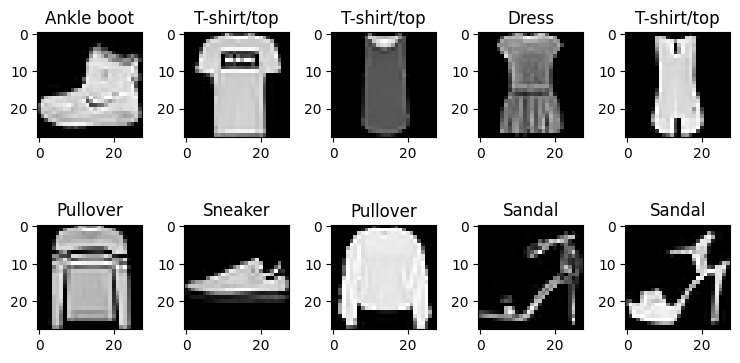

In [5]:
from assignment_2.utils.plot import plot_samples

plot_samples(X_train, y_train)

## Train autoencoder multiple times with different hyperparameters

### Autoencoder 1
#### Model:
- **layers dimensions:** 784, 256, 64, 256, 784
- **batch size:** 128
- **epochs:** 500
- **learning rate:** 0.1
- **shuffle batches:** true

In [6]:
from assignment_2.autoencoder import Autoencoder
from assignment_2.layer import Layer
from assignment_2.utils.weights import HeWeightInitializer
from assignment_2.utils.activation_functions import ReLUActivation

layers = [
    Layer(
        input_dim=784,
        num_of_neurons=256,
        weight_initializer=HeWeightInitializer(),
        activation_function=ReLUActivation(),
    ),
    Layer(
        input_dim=256,
        num_of_neurons=64,
        weight_initializer=HeWeightInitializer(),
        activation_function=ReLUActivation(),
    ),
    Layer(
        input_dim=64,
        num_of_neurons=256,
        weight_initializer=HeWeightInitializer(),
        activation_function=ReLUActivation(),
    ),
    Layer(
        input_dim=256,
        num_of_neurons=784,
        weight_initializer=HeWeightInitializer(),
        activation_function=ReLUActivation(),
    ),
]

autoencoder = Autoencoder(layers=layers)

In [7]:
from assignment_2.utils.optimizers import MiniBatchOptimizer
from assignment_2.utils.loss_functions import MeanSquaredError

autoencoder_optimizer = MiniBatchOptimizer(
    autoencoder,
    loss_function=MeanSquaredError(),
    batch_size=128,
    epochs=500,
    learning_rate=0.1,
    shuffle=True,
)
autoencoder_optimizer.optimize(X_train, X_train)

Started optimization of Autoencoder, classification=False
Epoch 1  --  accuracy 0.7613899 - loss 0.1105447
Epoch 2  --  accuracy 0.7810706 - loss 0.1009748
Epoch 3  --  accuracy 0.7932976 - loss 0.0957939
Epoch 4  --  accuracy 0.8058634 - loss 0.0913622
Epoch 5  --  accuracy 0.8144830 - loss 0.0883548
Epoch 6  --  accuracy 0.8218571 - loss 0.0858044
Epoch 7  --  accuracy 0.8270289 - loss 0.0838524
Epoch 8  --  accuracy 0.8313636 - loss 0.0824148
Epoch 9  --  accuracy 0.8344228 - loss 0.0812425
Epoch 10  --  accuracy 0.8371433 - loss 0.0801232
Epoch 11  --  accuracy 0.8394750 - loss 0.0790944
Epoch 12  --  accuracy 0.8410595 - loss 0.0781632
Epoch 13  --  accuracy 0.8433614 - loss 0.0774171
Epoch 14  --  accuracy 0.8455337 - loss 0.0762859
Epoch 15  --  accuracy 0.8469986 - loss 0.0756416
Epoch 16  --  accuracy 0.8488720 - loss 0.0750784
Epoch 17  --  accuracy 0.8502073 - loss 0.0745644
Epoch 18  --  accuracy 0.8519611 - loss 0.0737787
Epoch 19  --  accuracy 0.8533761 - loss 0.0732581
E

In [8]:
from assignment_2.utils.pickle import dump_pickle

dump_pickle("pickles/autoencoder_1.pickle", autoencoder)
dump_pickle("pickles/autoencoder_optimizer_1.pickle", autoencoder_optimizer)

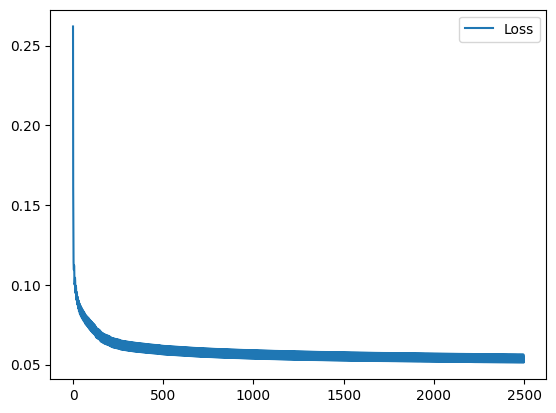

In [9]:
import matplotlib.pyplot as plt

plt.plot(autoencoder_optimizer.all_loss_values, label="Loss")
plt.legend(loc="upper right")
plt.show()

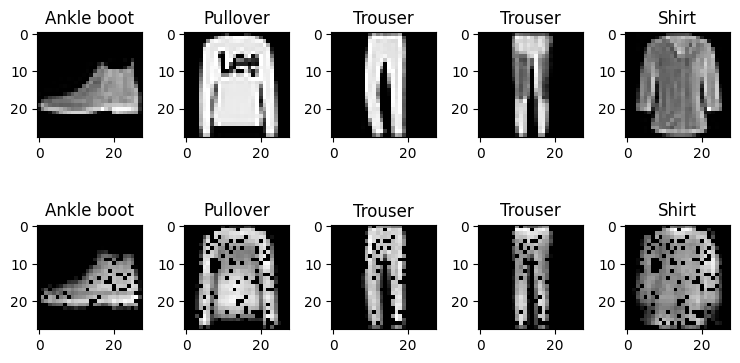

In [10]:
from assignment_2.utils.plot import plot_original_and_reconstructed

X_reconstructed = autoencoder.forward(X_test)
plot_original_and_reconstructed(X_test, X_reconstructed, y_test)

### Autoencoder 2
#### Model:
- **layers dimensions:** 784, 576, 144, 576, 784
- **batch size:** 128
- **epochs:** 500
- **learning rate:** 0.9
- **shuffle batches:** true

In [11]:
layers_2 = [
    Layer(
        input_dim=784,
        num_of_neurons=576,
        weight_initializer=HeWeightInitializer(),
        activation_function=ReLUActivation(),
    ),
    Layer(
        input_dim=576,
        num_of_neurons=144,
        weight_initializer=HeWeightInitializer(),
        activation_function=ReLUActivation(),
    ),
    Layer(
        input_dim=144,
        num_of_neurons=576,
        weight_initializer=HeWeightInitializer(),
        activation_function=ReLUActivation(),
    ),
    Layer(
        input_dim=576,
        num_of_neurons=784,
        weight_initializer=HeWeightInitializer(),
        activation_function=ReLUActivation(),
    ),
]

autoencoder_2 = Autoencoder(layers=layers_2)

In [12]:
autoencoder_optimizer_2 = MiniBatchOptimizer(
    autoencoder_2,
    loss_function=MeanSquaredError(),
    batch_size=128,
    epochs=500,
    learning_rate=0.9,
    shuffle=True,
)
autoencoder_optimizer_2.optimize(X_train, X_train)

Started optimization of Autoencoder, classification=False
Epoch 1  --  accuracy 0.8722098 - loss 0.0604527
Epoch 2  --  accuracy 0.8924685 - loss 0.0517084
Epoch 3  --  accuracy 0.8999821 - loss 0.0486321
Epoch 4  --  accuracy 0.9053631 - loss 0.0468375
Epoch 5  --  accuracy 0.9096381 - loss 0.0454145
Epoch 6  --  accuracy 0.9134845 - loss 0.0437970
Epoch 7  --  accuracy 0.9159857 - loss 0.0429235
Epoch 8  --  accuracy 0.9187859 - loss 0.0417467
Epoch 9  --  accuracy 0.9204699 - loss 0.0411270
Epoch 10  --  accuracy 0.9224530 - loss 0.0403089
Epoch 11  --  accuracy 0.9239577 - loss 0.0395775
Epoch 12  --  accuracy 0.9260503 - loss 0.0385553
Epoch 13  --  accuracy 0.9271564 - loss 0.0380602
Epoch 14  --  accuracy 0.9289601 - loss 0.0374037
Epoch 15  --  accuracy 0.9297274 - loss 0.0372258
Epoch 16  --  accuracy 0.9305744 - loss 0.0367857
Epoch 17  --  accuracy 0.9318499 - loss 0.0363318
Epoch 18  --  accuracy 0.9323382 - loss 0.0361194
Epoch 19  --  accuracy 0.9328663 - loss 0.0359519
E

In [13]:
dump_pickle("pickles/autoencoder_2.pickle", autoencoder_2)
dump_pickle("pickles/autoencoder_optimizer_2.pickle", autoencoder_optimizer_2)

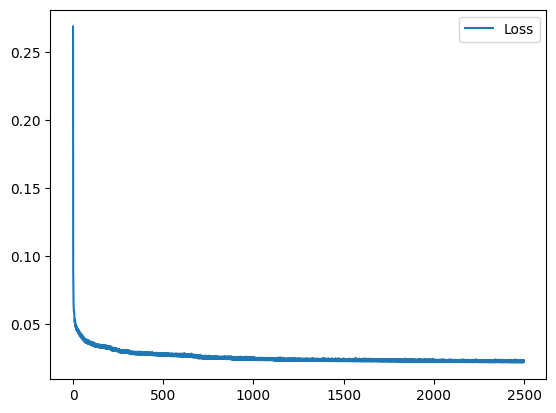

In [14]:
plt.plot(autoencoder_optimizer_2.all_loss_values, label="Loss")
plt.legend(loc="upper right")
plt.show()

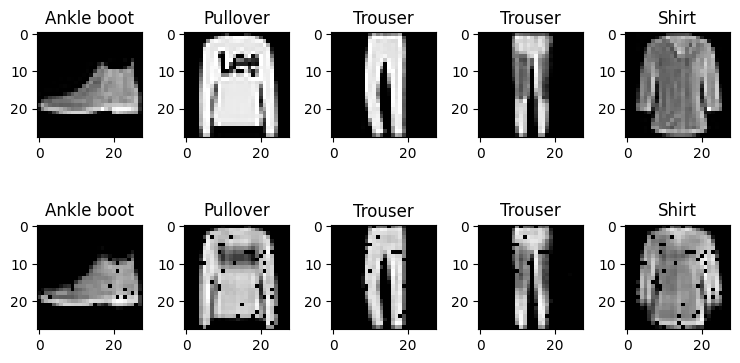

In [15]:
X_reconstructed_2 = autoencoder_2.forward(X_test)
plot_original_and_reconstructed(X_test, X_reconstructed_2, y_test)

## Introduce regularization techniques
### Dropout

### Autoencoder 3 (with Dropout layers)
#### Model:
- **layers dimensions:** 784, 256, 64, 256, 784
- **batch size:** 64
- **epochs:** 500
- **learning rate:** 0.5
- **shuffle batches:** true
- **dropout rate:** 0.3

In [16]:
from assignment_2.layer import DropoutLayer


layers_3 = [
    Layer(
        input_dim=784,
        num_of_neurons=256,
        weight_initializer=HeWeightInitializer(),
        activation_function=ReLUActivation(),
    ),
    DropoutLayer(0.3),
    Layer(
        input_dim=256,
        num_of_neurons=64,
        weight_initializer=HeWeightInitializer(),
        activation_function=ReLUActivation(),
    ),
    DropoutLayer(0.3),
    Layer(
        input_dim=64,
        num_of_neurons=256,
        weight_initializer=HeWeightInitializer(),
        activation_function=ReLUActivation(),
    ),
    DropoutLayer(0.3),
    Layer(
        input_dim=256,
        num_of_neurons=784,
        weight_initializer=HeWeightInitializer(),
        activation_function=ReLUActivation(),
    ),
]
autoencoder_3 = Autoencoder(layers=layers_3)

In [17]:
from assignment_2.utils.optimizers import MiniBatchOptimizer
from assignment_2.utils.loss_functions import MeanSquaredError

autoencoder_optimizer_3 = MiniBatchOptimizer(
    autoencoder_3,
    loss_function=MeanSquaredError(),
    batch_size=64,
    epochs=500,
    learning_rate=0.5,
    shuffle=True,
)
autoencoder_optimizer_3.optimize(X_train, X_train)

Started optimization of Autoencoder, classification=False
Epoch 1  --  accuracy 0.7778021 - loss 0.0858877
Epoch 2  --  accuracy 0.8153500 - loss 0.0724550
Epoch 3  --  accuracy 0.8292610 - loss 0.0671256
Epoch 4  --  accuracy 0.8380102 - loss 0.0648959
Epoch 5  --  accuracy 0.8452248 - loss 0.0615992
Epoch 6  --  accuracy 0.8508450 - loss 0.0587998
Epoch 7  --  accuracy 0.8600925 - loss 0.0565629
Epoch 8  --  accuracy 0.8488919 - loss 0.0593820
Epoch 9  --  accuracy 0.8578404 - loss 0.0570692
Epoch 10  --  accuracy 0.8640784 - loss 0.0549668
Epoch 11  --  accuracy 0.8720105 - loss 0.0516967
Epoch 12  --  accuracy 0.8653340 - loss 0.0536180
Epoch 13  --  accuracy 0.8737046 - loss 0.0515816
Epoch 14  --  accuracy 0.8742626 - loss 0.0513437
Epoch 15  --  accuracy 0.8674267 - loss 0.0531214
Epoch 16  --  accuracy 0.8731665 - loss 0.0521674
Epoch 17  --  accuracy 0.8664102 - loss 0.0511843
Epoch 18  --  accuracy 0.8765944 - loss 0.0505936
Epoch 19  --  accuracy 0.8746014 - loss 0.0505459
E

In [18]:
dump_pickle("pickles/autoencoder_3.pickle", autoencoder_3)
dump_pickle("pickles/autoencoder_optimizer_3.pickle", autoencoder_optimizer_3)

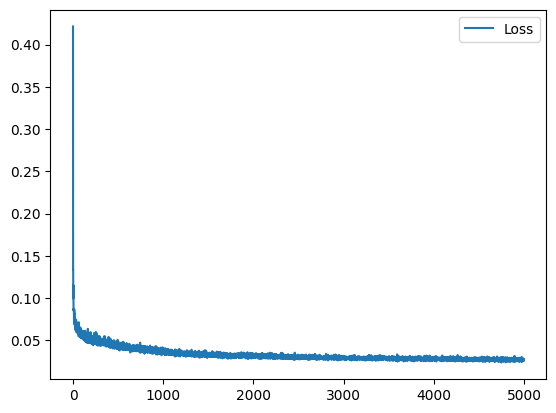

In [19]:
plt.plot(autoencoder_optimizer_3.all_loss_values, label="Loss")
plt.legend(loc="upper right")
plt.show()

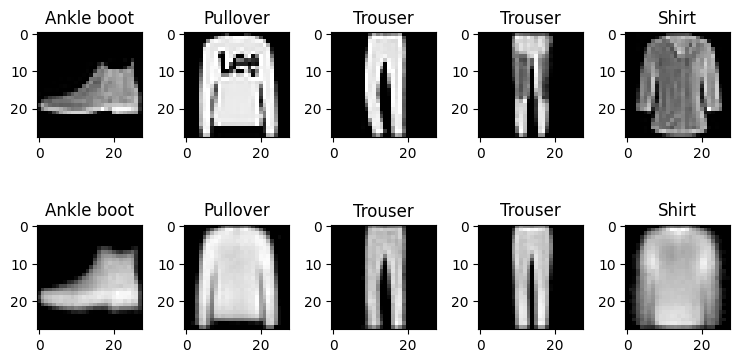

In [20]:
X_reconstructed_3 = autoencoder_3.forward(X_test)
plot_original_and_reconstructed(X_test, X_reconstructed_3, y_test)

### Autoencoder 4 (with Dropout layers)
#### Model:
- **layers dimensions:** 784, 256, 64, 256, 784
- **batch size:** 64
- **epochs:** 500
- **learning rate:** 0.5
- **shuffle batches:** true
- **dropout rate:** 0.1

In [21]:
layers_4 = [
    Layer(
        input_dim=784,
        num_of_neurons=256,
        weight_initializer=HeWeightInitializer(),
        activation_function=ReLUActivation(),
    ),
    DropoutLayer(0.1),
    Layer(
        input_dim=256,
        num_of_neurons=64,
        weight_initializer=HeWeightInitializer(),
        activation_function=ReLUActivation(),
    ),
    DropoutLayer(0.1),
    Layer(
        input_dim=64,
        num_of_neurons=256,
        weight_initializer=HeWeightInitializer(),
        activation_function=ReLUActivation(),
    ),
    DropoutLayer(0.1),
    Layer(
        input_dim=256,
        num_of_neurons=784,
        weight_initializer=HeWeightInitializer(),
        activation_function=ReLUActivation(),
    ),
]

autoencoder_4 = Autoencoder(layers=layers_4)

In [22]:
autoencoder_optimizer_4 = MiniBatchOptimizer(
    autoencoder_4,
    loss_function=MeanSquaredError(),
    batch_size=64,
    epochs=500,
    learning_rate=0.5,
    shuffle=True,
)
autoencoder_optimizer_4.optimize(X_train, X_train)

Started optimization of Autoencoder, classification=False
Epoch 1  --  accuracy 0.8128986 - loss 0.0767269
Epoch 2  --  accuracy 0.8464605 - loss 0.0647562
Epoch 3  --  accuracy 0.8614078 - loss 0.0597513
Epoch 4  --  accuracy 0.8724290 - loss 0.0548505
Epoch 5  --  accuracy 0.8780493 - loss 0.0521261
Epoch 6  --  accuracy 0.8735053 - loss 0.0543931
Epoch 7  --  accuracy 0.8784479 - loss 0.0505521
Epoch 8  --  accuracy 0.8941725 - loss 0.0453915
Epoch 9  --  accuracy 0.8840880 - loss 0.0473972
Epoch 10  --  accuracy 0.8880540 - loss 0.0461505
Epoch 11  --  accuracy 0.8934949 - loss 0.0440612
Epoch 12  --  accuracy 0.8990155 - loss 0.0427905
Epoch 13  --  accuracy 0.9026028 - loss 0.0418089
Epoch 14  --  accuracy 0.9055126 - loss 0.0405899
Epoch 15  --  accuracy 0.9037388 - loss 0.0409633
Epoch 16  --  accuracy 0.8999522 - loss 0.0417689
Epoch 17  --  accuracy 0.9106944 - loss 0.0379829
Epoch 18  --  accuracy 0.9101363 - loss 0.0376716
Epoch 19  --  accuracy 0.9105748 - loss 0.0380015
E

In [23]:
dump_pickle("pickles/autoencoder_4.pickle", autoencoder_4)
dump_pickle("pickles/autoencoder_optimizer_4.pickle", autoencoder_optimizer_4)

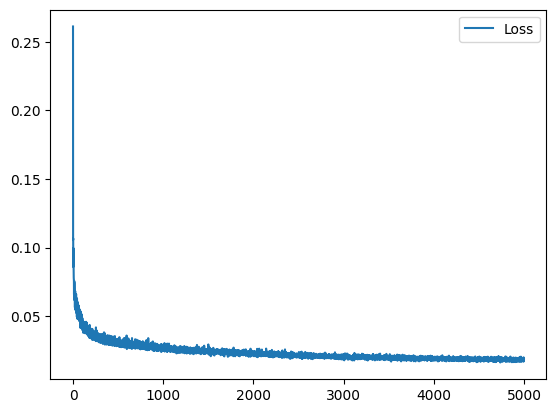

In [24]:
plt.plot(autoencoder_optimizer_4.all_loss_values, label="Loss")
plt.legend(loc="upper right")
plt.show()

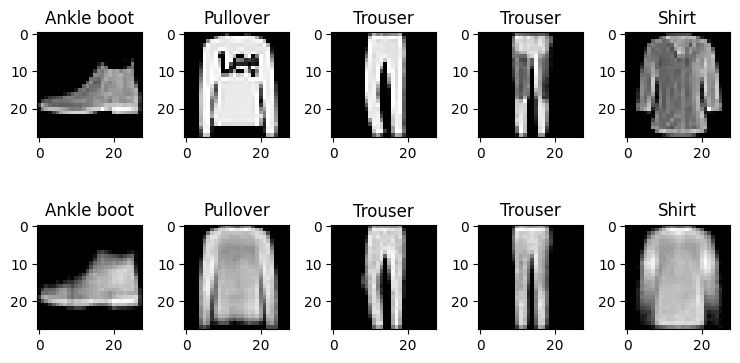

In [25]:
X_reconstructed_4 = autoencoder_4.forward(X_test)
plot_original_and_reconstructed(X_test, X_reconstructed_4, y_test)

### Noise Injection

In [10]:
import numpy as np

NOISE_FACTOR = 0.2

X_train_noisy = X_train + NOISE_FACTOR * np.random.normal(size=X_train.shape)
X_test_noisy = X_test + NOISE_FACTOR * np.random.normal(size=X_test.shape)

X_train_noisy = np.clip(X_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(X_test_noisy, 0.0, 1.0)

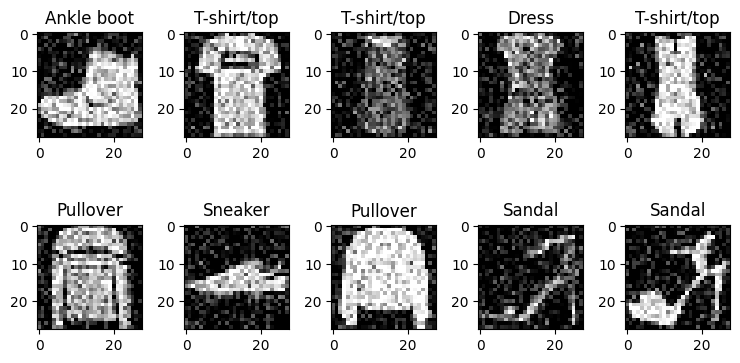

In [27]:
plot_samples(X_train_noisy, y_train)

### Autoencoder 5 (with Noise Injection and Dropout)
#### Model:
- **layers dimensions:** 784, 256, 64, 256, 784
- **batch size:** 128
- **epochs:** 500
- **learning rate:** 0.5
- **shuffle batches:** true

In [28]:
layers_5 = [
    Layer(
        input_dim=784,
        num_of_neurons=256,
        weight_initializer=HeWeightInitializer(),
        activation_function=ReLUActivation(),
    ),
    DropoutLayer(0.1),
    Layer(
        input_dim=256,
        num_of_neurons=64,
        weight_initializer=HeWeightInitializer(),
        activation_function=ReLUActivation(),
    ),
    DropoutLayer(0.1),
    Layer(
        input_dim=64,
        num_of_neurons=256,
        weight_initializer=HeWeightInitializer(),
        activation_function=ReLUActivation(),
    ),
    DropoutLayer(0.1),
    Layer(
        input_dim=256,
        num_of_neurons=784,
        weight_initializer=HeWeightInitializer(),
        activation_function=ReLUActivation(),
    ),
]

autoencoder_5 = Autoencoder(layers_5)

In [29]:
autoencoder_optimizer_5 = MiniBatchOptimizer(
    autoencoder_5,
    loss_function=MeanSquaredError(),
    batch_size=128,
    epochs=500,
    learning_rate=0.5,
    shuffle=True,
)
autoencoder_optimizer_5.optimize(X_train_noisy, X_train)

Started optimization of Autoencoder, classification=False
Epoch 1  --  accuracy 0.7755102 - loss 0.0941308
Epoch 2  --  accuracy 0.8118622 - loss 0.0789693
Epoch 3  --  accuracy 0.8405812 - loss 0.0687645
Epoch 4  --  accuracy 0.8529277 - loss 0.0628701
Epoch 5  --  accuracy 0.8578404 - loss 0.0609281
Epoch 6  --  accuracy 0.8645468 - loss 0.0576396
Epoch 7  --  accuracy 0.8680345 - loss 0.0553873
Epoch 8  --  accuracy 0.8670480 - loss 0.0548391
Epoch 9  --  accuracy 0.8816566 - loss 0.0504011
Epoch 10  --  accuracy 0.8810288 - loss 0.0496696
Epoch 11  --  accuracy 0.8875159 - loss 0.0470842
Epoch 12  --  accuracy 0.8842973 - loss 0.0485111
Epoch 13  --  accuracy 0.8885124 - loss 0.0468710
Epoch 14  --  accuracy 0.8906948 - loss 0.0460031
Epoch 15  --  accuracy 0.8912229 - loss 0.0462775
Epoch 16  --  accuracy 0.8942323 - loss 0.0443267
Epoch 17  --  accuracy 0.8969527 - loss 0.0435989
Epoch 18  --  accuracy 0.8944715 - loss 0.0439257
Epoch 19  --  accuracy 0.8977101 - loss 0.0429269
E

In [30]:
dump_pickle("pickles/autoencoder_5.pickle", autoencoder_5)
dump_pickle("pickles/autoencoder_optimizer_5.pickle", autoencoder_optimizer_5)

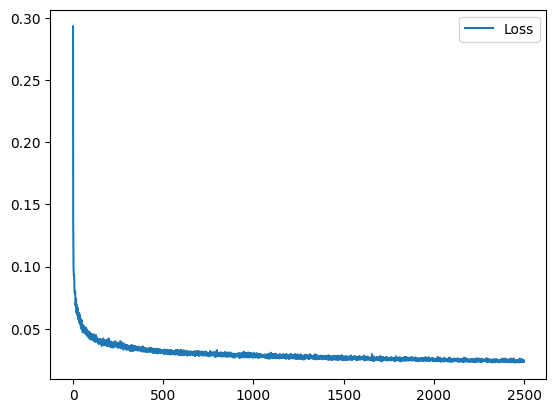

In [31]:
plt.plot(autoencoder_optimizer_5.all_loss_values, label="Loss")
plt.legend(loc="upper right")
plt.show()

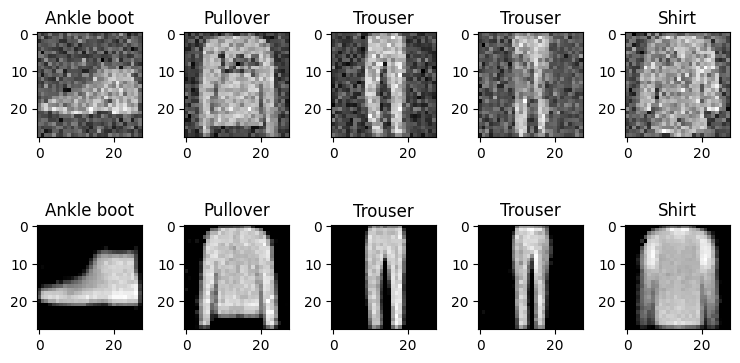

In [15]:
X_reconstructed_5 = autoencoder_5.forward(X_test_noisy)
plot_original_and_reconstructed(X_test_noisy, X_reconstructed_5, y_test)